# Data analysis with python using Pandas dataframe: Covid-19 dataset
1. Finding the number of confirmed, deaths and recovered cases in each region.
2. Finding the region in which maximum number of confirmed cases were recorded.
3. Finding the region where minimum number of deaths were recorded.
4. Finding the number of confirmed, death and recovered cases reported for Pakistan till April 29, 2020.
5. Removing all the records where confirmed cases are less than 10.

In [35]:
import pandas as pd

In [36]:
covid_19 = pd.read_csv("data/covid_19_data.csv")

In [37]:
# Displaying the dataset
covid_19

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [38]:
# Displaying the number of rows and columns in dataset
covid_19.shape

(321, 6)

In [39]:
# Showing the number of non-null values in each column of dataframe (null values means missing values)
covid_19.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [40]:
# All columns contain perfect data except 'State' column with 181 missing values

In [41]:
# Showing all the null values in the dataset in the form of Boolean (True means null value)
covid_19.isnull()

,Date,State,Region,Confirmed,Deaths,Recovered
0,False,True,False,False,False,False
1,False,True,False,False,False,False
2,False,True,False,False,False,False
3,False,True,False,False,False,False
4,False,True,False,False,False,False
...,...,...,...,...,...,...
316,False,False,False,False,False,False
317,False,False,False,False,False,False
318,False,False,False,False,False,False
319,False,False,False,False,False,False


In [42]:
# Showing number of null values in each column
covid_19.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [43]:
# importing libraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

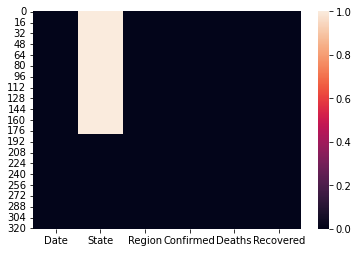

In [44]:
# heatmap for null values
sns.heatmap(covid_19.isnull())
plt.show()

In [45]:
# Only in 'State' column, we have some null values

# Number of confirmed, deaths and recovered cases in each region

In [46]:
covid_19.head(3)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702


In [47]:
# each ---- using groupby function in pandas
covid_19.groupby('Region').sum()

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


In [48]:
covid_19.groupby('Region').sum().head(20)

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
Antigua and Barbuda,24,3,11
Argentina,4285,214,1192
Armenia,1932,30,900
Australia,6752,91,5715


In [49]:
# Only number of 'Confirmed' cases in each 'Region' (Alphabetically)
# Note: Columns are case sensitive
covid_19.groupby('Region')['Confirmed'].sum()

Region
Afghanistan           1939
Albania                766
Algeria               3848
Andorra                743
Angola                  27
                      ... 
West Bank and Gaza     344
Western Sahara           6
Yemen                    6
Zambia                  97
Zimbabwe                32
Name: Confirmed, Length: 187, dtype: int64

In [50]:
# Only number of 'Deaths' in each 'Region'
covid_19.groupby('Region')['Deaths'].sum()

Region
Afghanistan            60
Albania                30
Algeria               444
Andorra                42
Angola                  2
                     ... 
West Bank and Gaza      2
Western Sahara          0
Yemen                   0
Zambia                  3
Zimbabwe                4
Name: Deaths, Length: 187, dtype: int64

In [51]:
# Only number of 'Recovered' cases in each 'Region'
covid_19.groupby('Region')['Recovered'].sum()

Region
Afghanistan            252
Albania                455
Algeria               1702
Andorra                423
Angola                   7
                      ... 
West Bank and Gaza      71
Western Sahara           5
Yemen                    1
Zambia                  54
Zimbabwe                 5
Name: Recovered, Length: 187, dtype: int64

In [52]:
# Showing results for two columns together
covid_19.groupby('Region')['Recovered', 'Confirmed'].sum()

C:\Users\Mini\AppData\Local\Temp\ipykernel_10536\961611892.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid_19.groupby('Region')['Recovered', 'Confirmed'].sum()


,Recovered,Confirmed
Region,,
Afghanistan,252,1939
Albania,455,766
Algeria,1702,3848
Andorra,423,743
Angola,7,27
...,...,...
West Bank and Gaza,71,344
Western Sahara,5,6
Yemen,1,6


# Region with maximum number of confirmed cases 

In [53]:
# Using sort_values(ascending = False) to find region with maximum number of confirmed cases

In [54]:
covid_19.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).head()

Region
US        1039909
Spain      236899
Italy      203591
France     166543
UK         166441
Name: Confirmed, dtype: int64

In [55]:
# US had maximum number of confirmed cases

# Region with minimum number of deaths

In [57]:
# Using sort_values(ascending = True) to find region with minimum number of confirmed cases

In [58]:
covid_19.groupby('Region')['Deaths'].sum().sort_values(ascending=True).head(30)

Region
Laos                                0
Mongolia                            0
Mozambique                          0
Cambodia                            0
Fiji                                0
Namibia                             0
Nepal                               0
Madagascar                          0
Macau                               0
Papua New Guinea                    0
Rwanda                              0
Saint Kitts and Nevis               0
Bhutan                              0
Dominica                            0
Central African Republic            0
Saint Lucia                         0
Holy See                            0
Sao Tome and Principe               0
Yemen                               0
Western Sahara                      0
Eritrea                             0
Vietnam                             0
Saint Vincent and the Grenadines    0
Timor-Leste                         0
Uganda                              0
Grenada                             0
South

In [59]:
# There are 28 countries with "zero" deaths

# Number of confirmed, death and recovered cases reported for Pakistan till April 29, 2020

In [60]:
covid_19[covid_19.Region == 'Pakistan']

,Date,State,Region,Confirmed,Deaths,Recovered
124,4/29/2020,NaN,Pakistan,15525,343,3425


In [61]:
# Many states are metioned along Canada 'Region'
covid_19[covid_19.Region == 'Canada']

,Date,State,Region,Confirmed,Deaths,Recovered
183,4/29/2020,Alberta,Canada,5165,87,0
193,4/29/2020,British Columbia,Canada,2087,109,0
203,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0
215,4/29/2020,Grand Princess,Canada,13,0,0
246,4/29/2020,Manitoba,Canada,275,6,0
259,4/29/2020,New Brunswick,Canada,118,0,0
266,4/29/2020,Newfoundland and Labrador,Canada,258,3,0
272,4/29/2020,Northwest Territories,Canada,5,0,0
273,4/29/2020,Nova Scotia,Canada,935,28,0
276,4/29/2020,Ontario,Canada,16978,1153,0


# Removing all the records with number of confirmed cases less than 10

In [68]:
covid_19.head(3)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702


In [63]:
covid_19.Confirmed < 10

0      False
1      False
2      False
3      False
4      False
       ...  
316    False
317    False
318    False
319    False
320    False
Name: Confirmed, Length: 321, dtype: bool

In [74]:
# Displaying the records with confirmed cases less than 10
covid_19[covid_19.Confirmed < 10]

,Date,State,Region,Confirmed,Deaths,Recovered
18,4/29/2020,NaN,Bhutan,7,0,5
98,4/29/2020,NaN,MS Zaandam,9,2,0
105,4/29/2020,NaN,Mauritania,8,1,6
126,4/29/2020,NaN,Papua New Guinea,8,0,0
140,4/29/2020,NaN,Sao Tome and Principe,8,0,4
177,4/29/2020,NaN,Western Sahara,6,0,5
178,4/29/2020,NaN,Yemen,6,0,1
184,4/29/2020,Anguilla,UK,3,0,3
192,4/29/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0
194,4/29/2020,British Virgin Islands,UK,6,1,3


In [70]:
# Removinf all the records with confirmed cases less than 10
covid_19[~(covid_19.Confirmed) < 10]

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [72]:
# Confirming whether the data is still there or not
covid_19.head(50)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
5,4/29/2020,NaN,Antigua and Barbuda,24,3,11
6,4/29/2020,NaN,Argentina,4285,214,1192
7,4/29/2020,NaN,Armenia,1932,30,900
8,4/29/2020,NaN,Austria,15402,580,12779
9,4/29/2020,NaN,Azerbaijan,1766,23,1267


In [73]:
# There are still some records with confired cases less than 10

In [75]:
# Removing the records permanently from dataset
covid_19 = covid_19[~(covid_19.Confirmed) < 10]

In [76]:
# Checking again
covid_19.head(50)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
5,4/29/2020,NaN,Antigua and Barbuda,24,3,11
6,4/29/2020,NaN,Argentina,4285,214,1192
7,4/29/2020,NaN,Armenia,1932,30,900
8,4/29/2020,NaN,Austria,15402,580,12779
9,4/29/2020,NaN,Azerbaijan,1766,23,1267


In [77]:
# Thus the records with Confirmed cases less than 10 are removed permamently